<img src="https://www.highereducationdigest.com/wp-content/uploads/2021/03/IIIT-B-Upgrad.jpg" class = "center" width = "240" height="360" />



# MULTIPLE LINEAR REGRESSION ASSIGNMENT
                                                             - Vinoda Varshini Rajagopal

## Table of Content

1. [Problem Statement](#section1)<br>    
2. [Data Loading and Description](#section2)<br>
3. [Data cleaning](#section3)<br>
4. [Exploratory Data Analysis](#section4)<br>
5. [Training linear regression model](#section5)<br>
    - 5.1 [Splitting data into trainset and testset](#section501)<br>
    - 5.2 [Rescaling the features](#section502)<br>
    - 5.3 [Splitting into X_train and y_train on training dataset](#section503)<br>
    - 5.4 [Building Linear Model using Statsmodel](#section504)<br>
         - 5.4.1 [Selecting features and model training using RFE](#sectionrfe)<br>
         - 5.4.2 [Stats model 1](#sectionmodel1)<br>
         - 5.4.3 [Stats model 2](#sectionmodel2)<br>
         - 5.4.4 [Stats model 3](#sectionmodel3)<br>
         - 5.4.5 [Stats model 4](#sectionmodel4)<br>
         - 5.4.6 [Stats model 5](#sectionmodel5)<br>
         - 5.4.7 [Stats model 6](#sectionmodel6)<br>
         - 5.4.8 [Stats model 7](#sectionmodel7)<br> 
    - 5.5 [Line Equation of the model](#section505)<br>
    - 5.6 [Validating the model](#section506)<br>
6. [Testing Linear regression model](#section6)<br>
    - 6.1 [Rescaling features on Testdata](#section601)<br>
    - 6.2 [Splitting into X_test and y_test](#section602)<br>
    - 6.3 [Performing predictions on Testset](#section603)<br>
7. [Model evaluation](#section7)<br>
    - 7.1 [Model Evaluation using R-squared value.](#section701)<br>
    - 7.2 [Model Evaluation using Adjusted R-squared value](#section702)<br>
    - 7.3 [Model Evaluation using RMSE](#section703)<br>
8. [Conclusion](#section8)<br>
    


## 1. Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider __BoomBikes__ has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands

## 2. Data Loading and Description

The bike sharing dataset captures count of the number of times customers used its bikes, and it has other features like date, season, weather, user details etc.

- Dataset contains following fields


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| instant       | record index   | 
| dteday        | date                            |  
| season        | season (1:spring, 2:summer, 3:fall, 4:winter)                      | 
| yr            | year (0: 2018, 1:2019)                         |
| mnth          | month ( 1 to 12)                       |
| holiday       | weather day is a holiday or not  |
| weekday       | day of the week |
| workingday    | if day is neither weekend nor holiday is 1, otherwise is 0.  |
| weathersit    | 1: Clear, Few clouds, Partly cloudy, Partly cloudy. 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist. 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   |
| temp          | temperature in Celsius |
| atemp         | feeling temperature in Celsius|
| hum           | humidity |
| windspeed     | wind speed|
| casual        | count of casual users |
| registered    | count of registered users |
| cnt           | count of total rental bikes including both casual and registered |


__Importing Packages__

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

%matplotlib inline                                                # allow plots to appear directly in the notebook

import warnings
warnings.filterwarnings('ignore')

UsageError: unrecognized arguments: # allow plots to appear directly in the notebook


In [2]:
!pip install plotly 

In [3]:
!pip install chart-studio

In [4]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

__Importing the Dataset__

In [5]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## 3. Data Cleaning

In [6]:
data.shape

(730, 16)

#### Observation
Our dataset contains __730 records__ and __15 features__.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Observations
- There is no missing values in our dataset.
- **4** fields have datatype as __float__.
- **10** fields have datatype as __integer__.
- **1** field have datatype as __object__.

### Replacing the fields 'season', 'mnth', 'weekday' and  'weathersit' to categorical string values

- By converting the fields 'season' and 'weathersit' to categorical helps us to visualize our data better and provide us useful information about the data.

In [8]:
data['season'] = data['season'].astype(str)              # Changing the datatype of the field 'season' to String
data['weathersit'] = data['weathersit'].astype(str)      # Changing the datatype of the field 'weathersit' to String
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(9), object(3)
memory usage: 91.4+ KB


In [9]:
data['season'].replace({'1':'spring', '2':'summer','3':'fall','4':'winter'},inplace = True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Replaced values of the column __season__
  - 1 : spring
  - 2 : summer
  - 3 : fall
  - 4 : winter

In [10]:
data['weathersit'].replace({'1':'Clear','2':'Mist','3':'Light Snow','4':'Heavy Rain'},inplace = True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Replaced values of the column __weathersit__
  - 1 : Clear
  - 2 : Mist
  - 3 : Light Snow
  - 4 : Heavy Rain

In [11]:
data.weekday.replace((0,1,2,3,4,5,6),('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Replaced values of column __weekday__  by __0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat__

In [12]:
data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


- Replaced values of column __mnth__ by __1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec__

### Replacing values in 'yr' field 

- Replace value __0 to 2018__ and __1 to 2019__

In [13]:
data['yr'] = data['yr'].astype(str) 
data['yr'].replace({'0':'2018','1':'2019'},inplace = True)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Dropping column 'instant' and 'dteday'

- ID variable are represented in the field 'instant', So, we are dropping this column.
- We have seperate column for year and month. So, we are dropping the column 'dteday'.

In [14]:
data.drop(['instant','dteday'], axis=1,inplace = True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Re-arranging the column in a better order

In [15]:
bikeshare_data = data[['mnth','yr','holiday','weekday','workingday','season','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']]
bikeshare_data.head()

,mnth,yr,holiday,weekday,workingday,season,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Jan,2018,0,Sat,0,spring,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Jan,2018,0,Sun,0,spring,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Jan,2018,0,Mon,1,spring,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Jan,2018,0,Tue,1,spring,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Jan,2018,0,Wed,1,spring,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
# Renaming column name 
bikeshare_data.rename(columns={'mnth':'Month','yr':'Year','hum':'Humidity'},inplace = True)    
bikeshare_data.head()

,Month,Year,holiday,weekday,workingday,season,weathersit,temp,atemp,Humidity,windspeed,casual,registered,cnt
0,Jan,2018,0,Sat,0,spring,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Jan,2018,0,Sun,0,spring,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Jan,2018,0,Mon,1,spring,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Jan,2018,0,Tue,1,spring,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Jan,2018,0,Wed,1,spring,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
bikeshare_data.isna().any()       # To check if there is any missing values in our dataset

Month         False
Year          False
holiday       False
weekday       False
workingday    False
season        False
weathersit    False
temp          False
atemp         False
Humidity      False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

__Observation__
- There is no null values in our data.

In [18]:
bikeshare_data.describe()

,holiday,workingday,temp,atemp,Humidity,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


__Observation__

- We can observe that there is no outliers in the data.

## 4. Exploratory Data Analysis

In [19]:
#For displaying maximum rows and columns
bikeshare_data.head(10)
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500) 
pd.set_option('display.width', 1000)

In [20]:
bikeshare_data.shape

(730, 14)

### Relationship between Temperature, Humidity and Windspeed on the bike sharing count

In [21]:
feature_numeric = bikeshare_data[["temp","atemp","Humidity","windspeed","cnt"]]

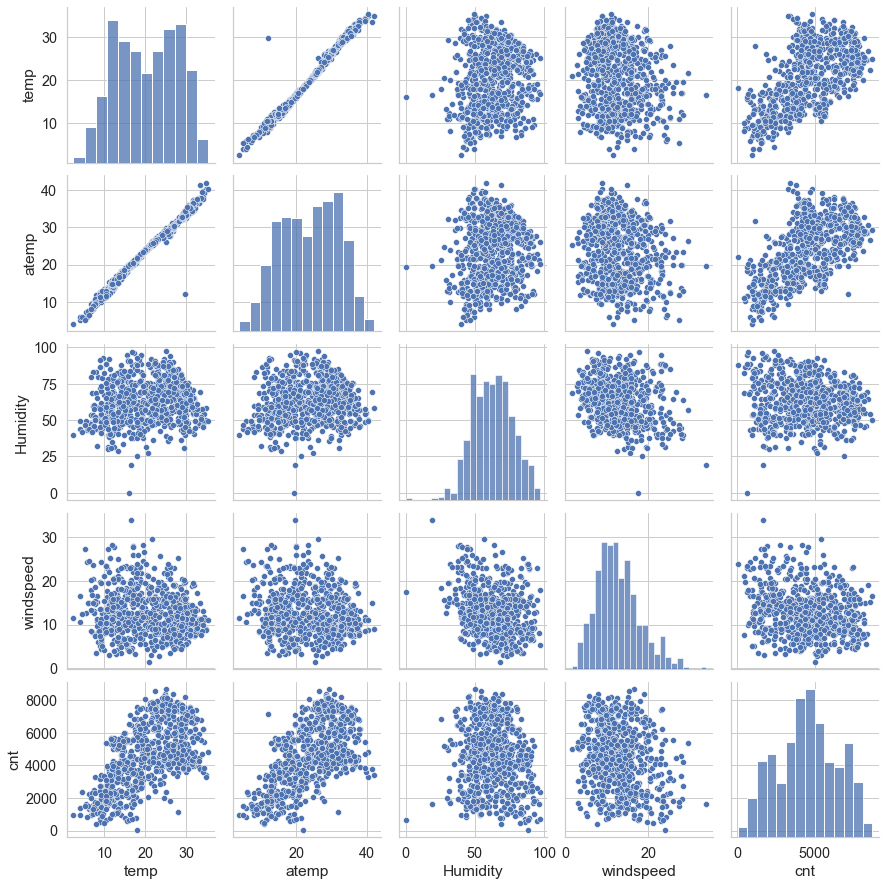

In [22]:
sns.pairplot(feature_numeric)
plt.show()

__Observation__<br/>
- There is a __linear relationship__ between __temp (Temperature) and cnt__

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\VINODA VARSHINI\Anaconda3\li

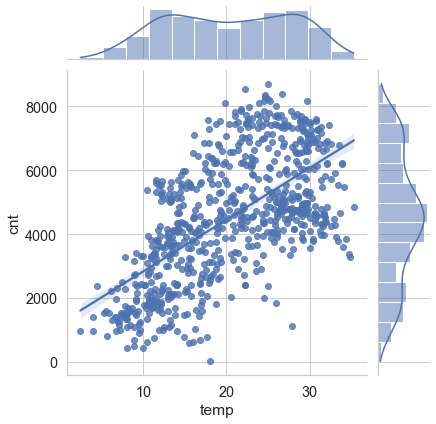

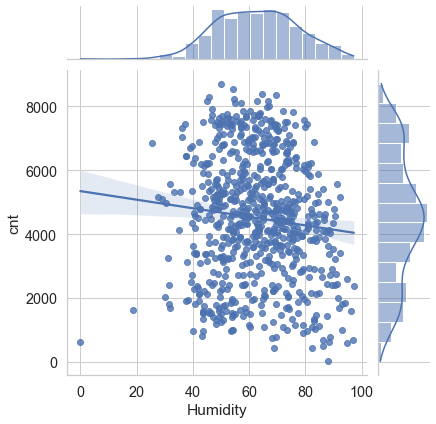

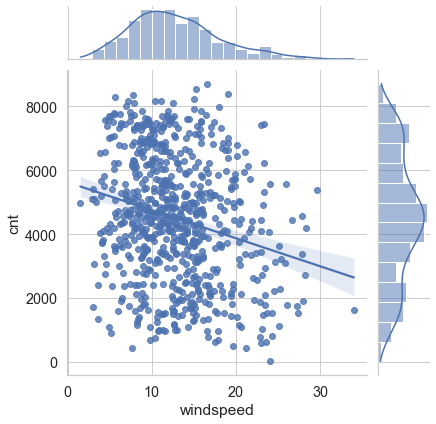

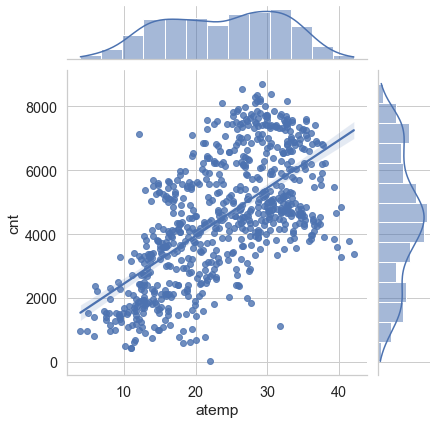

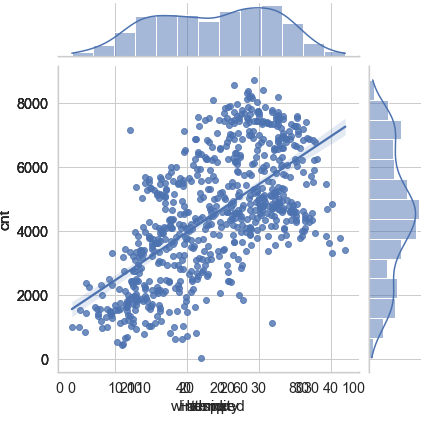

In [23]:
# Plotting joint plot on numeric variables
JG1 = sns.jointplot("temp", "cnt", data=bikeshare_data, kind='reg')
JG2 = sns.jointplot("Humidity", "cnt", data=bikeshare_data, kind='reg')
JG3 = sns.jointplot("windspeed", "cnt", data=bikeshare_data, kind='reg')
JG4 = sns.jointplot("atemp", "cnt", data=bikeshare_data, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3,JG4]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

__Observation__<br/>
- There is a __linear relationship__ between
  - __temperature (temp)__ and __(cnt)__
  - __feeling temperature (atemp)__ and count __(cnt)__
- whereas __humidity and windspeed__ has __no correlation__ on the bike sharing count. 

### Does Working day has more number of bike rentals?

In [24]:
workday_count = pd.DataFrame(bikeshare_data.workingday.value_counts().reset_index().values, columns=["workingday", "count"])
workday_cnt = workday_count.sort_index(axis = 0, ascending=True)
workday_cnt

,workingday,count
0,1,499
1,0,231


- Working day has more entries of bike rentals than non-working days

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



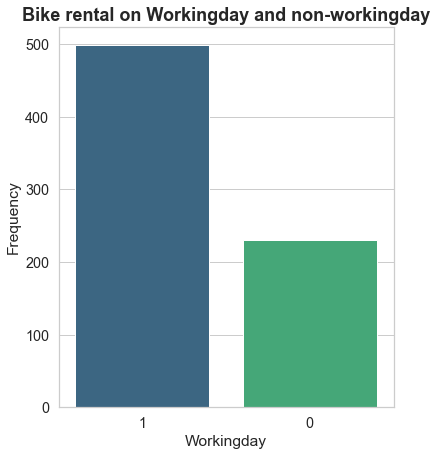

In [25]:
# Plotting frequency of bike rentals on working and Non-working day
plt.figure(figsize=(6,7))
sns.countplot('workingday',data = bikeshare_data, order = bikeshare_data['workingday'].value_counts().index,palette="viridis")
plt.title("Bike rental on Workingday and non-workingday",fontsize=18,fontweight="bold")
plt.xlabel('Workingday')
plt.ylabel('Frequency')
plt.show()

__Observations__<br/>
- Bike rentals are __huge__ during __working days__ compared to __non-working days__.

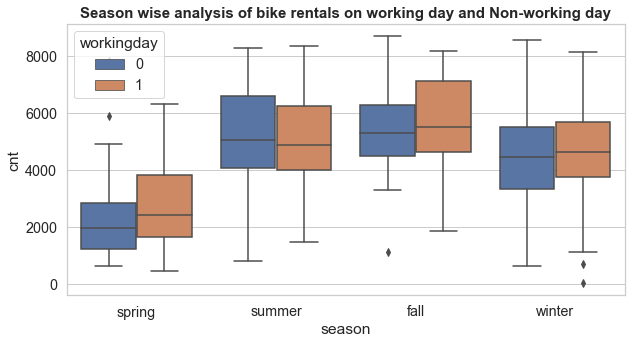

In [26]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = bikeshare_data)
plt.title('Season wise analysis of bike rentals on working day and Non-working day', fontsize = 15, fontweight ='bold')
plt.show()

__Observation__<br/>
- During __Fall__ maximum number of bike rentals are on __Working day__, where the 75th percentile reaches maximum.
- __Spring__ has __leaset__ number of bike rentals both on __working and nonworking days__.

### Does season affect renting a bike?

Text(0.5, 1.0, 'Season wise bike rental')

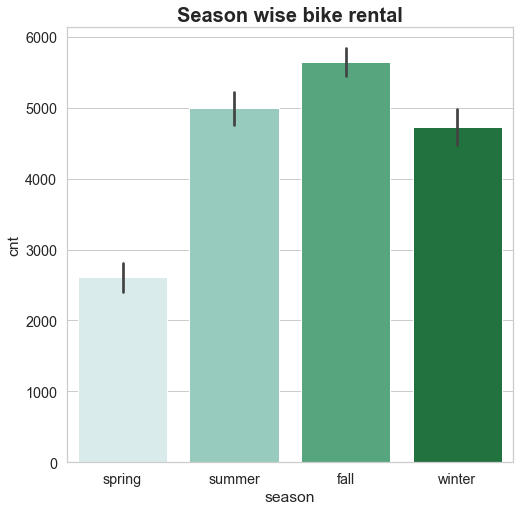

In [27]:
# Barplot for season wise analysis of bike rentals
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = "season", y = "cnt", data =bikeshare_data,palette="BuGn", ax=ax)
plt.title('Season wise bike rental', fontsize = 20, fontweight ='bold')

__Observation__<br/>
- __Fall__ has the __highest__ number of bike rentals which is __25.8%__.
- __Spring__ has __least__ number of bike rentals.

### Is Bike retal getting popular over the years?

In [28]:
year_month_data = bikeshare_data.iloc[:,[0,1,-1]]     #Selecting only specific columns
year_month_data

,Month,Year,cnt
0,Jan,2018,985
1,Jan,2018,801
2,Jan,2018,1349
3,Jan,2018,1562
4,Jan,2018,1600
...,...,...,...
725,Dec,2019,2114
726,Dec,2019,3095
727,Dec,2019,1341
728,Dec,2019,1796


In [29]:
new_data = year_month_data.groupby(by=['Year','Month']).sum()    # Grouping our dataframe by Year and Month and taking count of each month.
new_data

cnt
Year Month        
2018 Apr     94870
     Aug    136691
     Dec     87323
     Feb     48215
     Jan     38189
     Jul    141341
     Jun    143512
     Mar     64045
     May    135821
     Nov    102167
     Oct    123511
     Sep    127418
2019 Apr    174224
     Aug    214503
     Dec    123713
     Feb    101303
     Jan     96744
     Jul    203607
     Jun    202830
     Mar    164875
     May    195865
     Nov    152664
     Oct    198841
     Sep    218573

Text(0.5, 1.0, 'Line chart for Bike rentals based on month for the year 2018 and 2019')

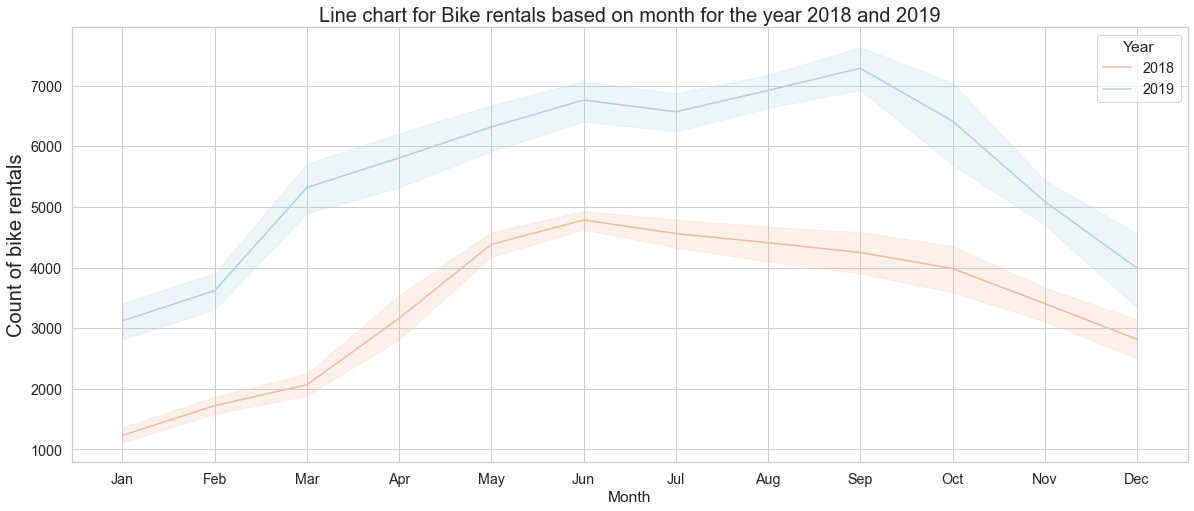

In [30]:
#Line plot for analysing bike rentals with month and year
fig,ax = plt.subplots(figsize=(20,8))
sns.lineplot(data=year_month_data[['Month','cnt','Year']], x='Month',y='cnt', hue='Year',ax=ax,palette="RdBu")
plt.ylabel('Count of bike rentals',fontsize = 20)
plt.title('Line chart for Bike rentals based on month for the year 2018 and 2019', fontsize = 20)

__Observation__<br/>
- __Bike rentals are getting popular over the years__.
- Count of bike rentals is __high__ during the __year 2019__.
- __September 2019__ has __highest__ number of bike rentals which croses __over 7000__.
- __December and January__ has __declination__ in the count of bike rentals in both the year. It may be due to Vacation and people do not go for work, so during these days there is less number of people renting a bike.
- In the year __2018 June__ has the __highest__ number of bike rentals.

### Which day of the week has highest and lowest number of bike rentals?

In [31]:
week_uni = bikeshare_data['weekday'].unique()       # To extract unique weekday values
week_uni

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [32]:
# To count the Total No.of bike rentals base on weekdays
weekday_cnt = {i:bikeshare_data[(bikeshare_data['weekday'] == i)]['cnt'].sum() for i in week_uni}
weekday_cnt

{'Sat': 477807,
 'Sun': 444027,
 'Mon': 455503,
 'Tue': 469109,
 'Wed': 471214,
 'Thu': 485395,
 'Fri': 487790}

In [33]:
# Creating a new Dataframe for weekday and its bike rental count 
weekday_df = pd.DataFrame(list(weekday_cnt.items()),columns=['Weekday','Count'])
weekday_df

,Weekday,Count
0,Sat,477807
1,Sun,444027
2,Mon,455503
3,Tue,469109
4,Wed,471214
5,Thu,485395
6,Fri,487790


Text(0.5, 1.0, 'Weekday wise count of bike rentals')

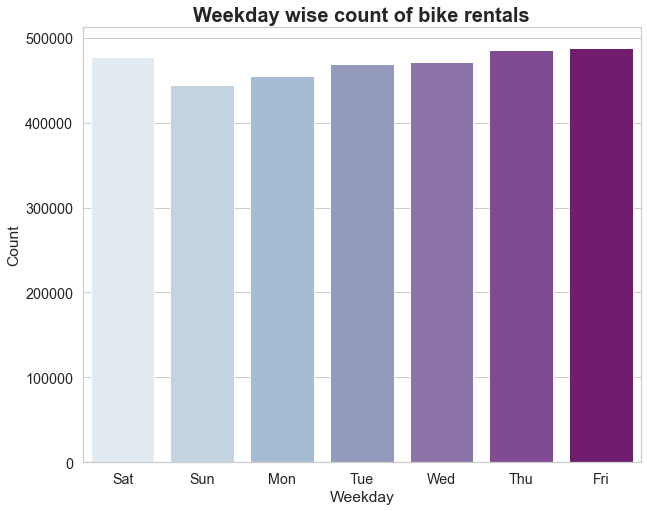

In [34]:
# barplot for count on bike rentals on weekdays
fig,ax = plt.subplots(figsize=(10,8))
sns.barplot(x = "Weekday", y = "Count", data =weekday_df,palette="BuPu")
plt.title('Weekday wise count of bike rentals', fontsize = 20, fontweight ='bold')


__Observation__<br/>
- During the year 2018 and 2019,
  - __Friday__ has the __highest__ number of bike rentals where __487790__ bikes were rented.
  - Followed by __Thursday__ which counts to __485395__ bikes were rented.
  - On __Saturday__ count of bikes rented was __477807__.
  - People rent bikes least on __Sunday__ which is __444027__.

### Which Weather has highest number of bike rentals?

Text(0.5, 1.0, 'Weather based bikerental')

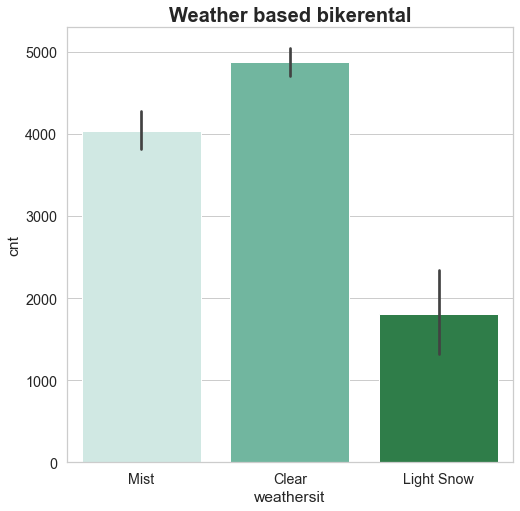

In [35]:
# Barplot for weather wise analysis of bike rentals
fig,ax = plt.subplots(figsize=(8,8))
sns.barplot(x = "weathersit", y = "cnt", data =bikeshare_data,palette="BuGn", ax=ax)
plt.title('Weather based bikerental', fontsize = 20, fontweight ='bold')

__Observation__<br/>
- __Clear__ weather has __high possibility__ of people opting for bike rentals.
- When there is __Light Snow__ number of bike rentals has __decreased__.
- __Mist__ does not impact the bike rentals as compared to light snow. Only few people do not rent a bike on misty weather when compared with clear weather.

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\User

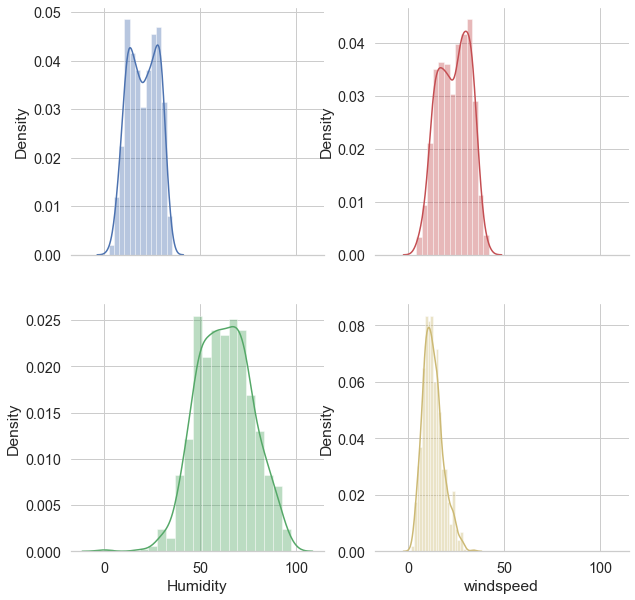

In [36]:
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)    # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(bikeshare_data.temp, color="b", ax=axes[0, 0])

sns.distplot(bikeshare_data.atemp, color="r", ax=axes[0, 1])

sns.distplot(bikeshare_data.Humidity, color="g", ax=axes[1, 0])

sns.distplot(bikeshare_data.windspeed, color="y", ax=axes[1, 1])

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



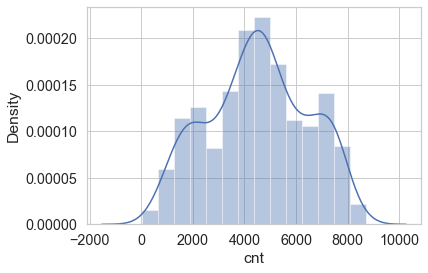

In [37]:
sns.distplot(bikeshare_data.cnt, color="b")

### Correlation Map

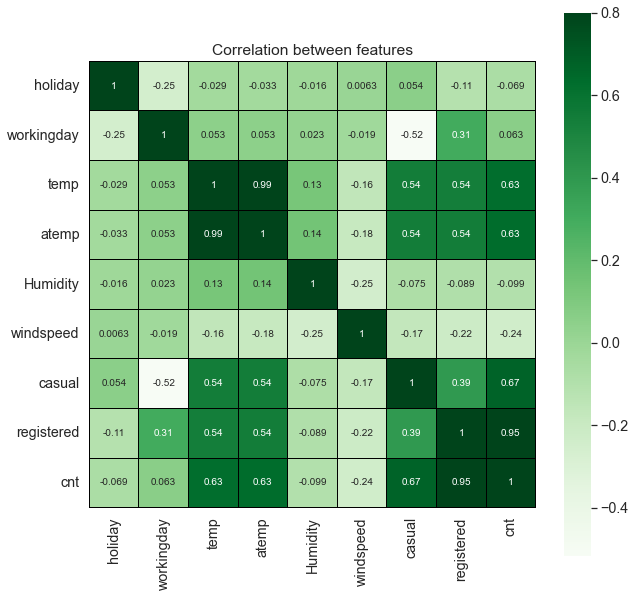

In [38]:
corr = bikeshare_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='Greens',linecolor ='black')
plt.title('Correlation between features')
plt.show()

__Observation__<br/>
- __High correlation__ exists between the fields __casual, registered and cnt__.
- __Dropping__ the column __casual and registered__ because its total is given in the column __cnt__.

In [39]:
bikeshare_data.drop(['casual','registered'],axis = 1,inplace=True)
bikeshare_data.head()

,Month,Year,holiday,weekday,workingday,season,weathersit,temp,atemp,Humidity,windspeed,cnt
0,Jan,2018,0,Sat,0,spring,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Jan,2018,0,Sun,0,spring,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Jan,2018,0,Mon,1,spring,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Jan,2018,0,Tue,1,spring,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Jan,2018,0,Wed,1,spring,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
bikeshare_data.drop(['atemp'],axis = 1,inplace=True)
bikeshare_data.head()

,Month,Year,holiday,weekday,workingday,season,weathersit,temp,Humidity,windspeed,cnt
0,Jan,2018,0,Sat,0,spring,Mist,14.110847,80.5833,10.749882,985
1,Jan,2018,0,Sun,0,spring,Mist,14.902598,69.6087,16.652113,801
2,Jan,2018,0,Mon,1,spring,Clear,8.050924,43.7273,16.636703,1349
3,Jan,2018,0,Tue,1,spring,Clear,8.200000,59.0435,10.739832,1562
4,Jan,2018,0,Wed,1,spring,Clear,9.305237,43.6957,12.522300,1600


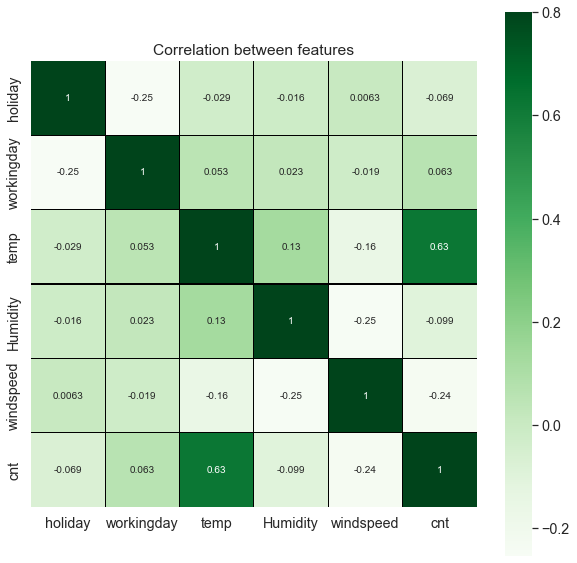

In [41]:
corr = bikeshare_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='Greens',linecolor ='black')
plt.title('Correlation between features')
plt.show()

__Observation__<br/>
- After removing the fields that are highy correlated, now our dataset looks fine.

In [42]:
bikeshare_data.head()

,Month,Year,holiday,weekday,workingday,season,weathersit,temp,Humidity,windspeed,cnt
0,Jan,2018,0,Sat,0,spring,Mist,14.110847,80.5833,10.749882,985
1,Jan,2018,0,Sun,0,spring,Mist,14.902598,69.6087,16.652113,801
2,Jan,2018,0,Mon,1,spring,Clear,8.050924,43.7273,16.636703,1349
3,Jan,2018,0,Tue,1,spring,Clear,8.200000,59.0435,10.739832,1562
4,Jan,2018,0,Wed,1,spring,Clear,9.305237,43.6957,12.522300,1600


__Encoding the categorical column to numeric__

In [43]:
bikeshare_data_mon = pd.get_dummies(bikeshare_data, columns = ['Month'],drop_first = True)
bikeshare_data_mon.head()

,Year,holiday,weekday,workingday,season,weathersit,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,2018,0,Sat,0,spring,Mist,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0
1,2018,0,Sun,0,spring,Mist,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0
2,2018,0,Mon,1,spring,Clear,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,Tue,1,spring,Clear,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0
4,2018,0,Wed,1,spring,Clear,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0


In [44]:
bikeshare_data_week = pd.get_dummies(bikeshare_data_mon, columns = ['weekday'],drop_first = True)
bikeshare_data_week.head()

,Year,holiday,workingday,season,weathersit,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed
0,2018,0,0,spring,Mist,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2018,0,0,spring,Mist,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2018,0,1,spring,Clear,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,2018,0,1,spring,Clear,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2018,0,1,spring,Clear,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [45]:
bikeshare_data_ses = pd.get_dummies(bikeshare_data_week, columns = ['season'],drop_first = True)
bikeshare_data_ses.head()

,Year,holiday,workingday,weathersit,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_spring,season_summer,season_winter
0,2018,0,0,Mist,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2018,0,0,Mist,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2018,0,1,Clear,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,2018,0,1,Clear,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,2018,0,1,Clear,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [46]:
bikeshare_data_wea = pd.get_dummies(bikeshare_data_ses, columns = ['weathersit'],drop_first = True)
bikeshare_data_wea.head()

,Year,holiday,workingday,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,2018,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,2018,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,2018,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,2018,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,2018,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


- Converting the column Year to integer and replacing it to 0 and 1 for 2018 and 2019 respectively.

In [47]:
bike_data_new = bikeshare_data_wea.replace({'Year':{'2018':'0','2019':'1'}})
bike_data_new.head()

,Year,holiday,workingday,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [48]:
bike_data_new['Year'] = bike_data_new['Year'].astype(str).astype(int)

In [49]:
bikeshare_data_new = bike_data_new
bikeshare_data_new.head()

,Year,holiday,workingday,temp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [50]:
bikeshare_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
Year                     730 non-null int32
holiday                  730 non-null int64
workingday               730 non-null int64
temp                     730 non-null float64
Humidity                 730 non-null float64
windspeed                730 non-null float64
cnt                      730 non-null int64
Month_Aug                730 non-null uint8
Month_Dec                730 non-null uint8
Month_Feb                730 non-null uint8
Month_Jan                730 non-null uint8
Month_Jul                730 non-null uint8
Month_Jun                730 non-null uint8
Month_Mar                730 non-null uint8
Month_May                730 non-null uint8
Month_Nov                730 non-null uint8
Month_Oct                730 non-null uint8
Month_Sep                730 non-null uint8
weekday_Mon              730 non-null uint8
weekday_Sat              730 non-null uint8
weekday_S

In [51]:
#re-arranging the fields of our dataset
data_bike = bikeshare_data_new[['Year','Month_Jan','Month_Feb','Month_Mar','Month_May','Month_Jun','Month_Jul','Month_Aug','Month_Sep','Month_Oct','Month_Nov','Month_Dec','weekday_Sun','weekday_Mon','weekday_Tue','weekday_Wed','weekday_Thu','weekday_Sat','season_spring','season_summer','season_winter','weathersit_Light Snow','weathersit_Mist','holiday','workingday','temp','Humidity','windspeed','cnt']]
data_bike.head()

,Year,Month_Jan,Month_Feb,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed,cnt
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,14.110847,80.5833,10.749882,985
1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,14.902598,69.6087,16.652113,801
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,9.305237,43.6957,12.522300,1600


## 5. Linear Regression

### 5.1 Splitting data into trainset  and testset

In [52]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data_bike, train_size = 0.7, test_size = 0.3, random_state = 100)

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
Year                     510 non-null int32
Month_Jan                510 non-null uint8
Month_Feb                510 non-null uint8
Month_Mar                510 non-null uint8
Month_May                510 non-null uint8
Month_Jun                510 non-null uint8
Month_Jul                510 non-null uint8
Month_Aug                510 non-null uint8
Month_Sep                510 non-null uint8
Month_Oct                510 non-null uint8
Month_Nov                510 non-null uint8
Month_Dec                510 non-null uint8
weekday_Sun              510 non-null uint8
weekday_Mon              510 non-null uint8
weekday_Tue              510 non-null uint8
weekday_Wed              510 non-null uint8
weekday_Thu              510 non-null uint8
weekday_Sat              510 non-null uint8
season_spring            510 non-null uint8
season_summer            510 non-null uint8
season_winter 

### 5.2 Rescaling the features

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler() to numeric fields
num_vars = ['temp','Humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 29 columns):
Year                     510 non-null int32
Month_Jan                510 non-null uint8
Month_Feb                510 non-null uint8
Month_Mar                510 non-null uint8
Month_May                510 non-null uint8
Month_Jun                510 non-null uint8
Month_Jul                510 non-null uint8
Month_Aug                510 non-null uint8
Month_Sep                510 non-null uint8
Month_Oct                510 non-null uint8
Month_Nov                510 non-null uint8
Month_Dec                510 non-null uint8
weekday_Sun              510 non-null uint8
weekday_Mon              510 non-null uint8
weekday_Tue              510 non-null uint8
weekday_Wed              510 non-null uint8
weekday_Thu              510 non-null uint8
weekday_Sat              510 non-null uint8
season_spring            510 non-null uint8
season_summer            510 non-null uint8
season_winter 

In [56]:
df_train.describe()

,Year,Month_Jan,Month_Feb,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.088235,0.066667,0.098039,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.143137,0.150980,0.131373,0.158824,0.133333,0.154902,0.243137,0.245098,0.24902,0.029412,0.343137,0.025490,0.676471,0.537262,0.650369,0.320768,0.513620
std,0.500429,0.283915,0.249689,0.297660,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.350557,0.358381,0.338139,0.365870,0.340268,0.362166,0.429398,0.430568,0.43287,0.169124,0.475223,0.157763,0.468282,0.225844,0.145882,0.169797,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


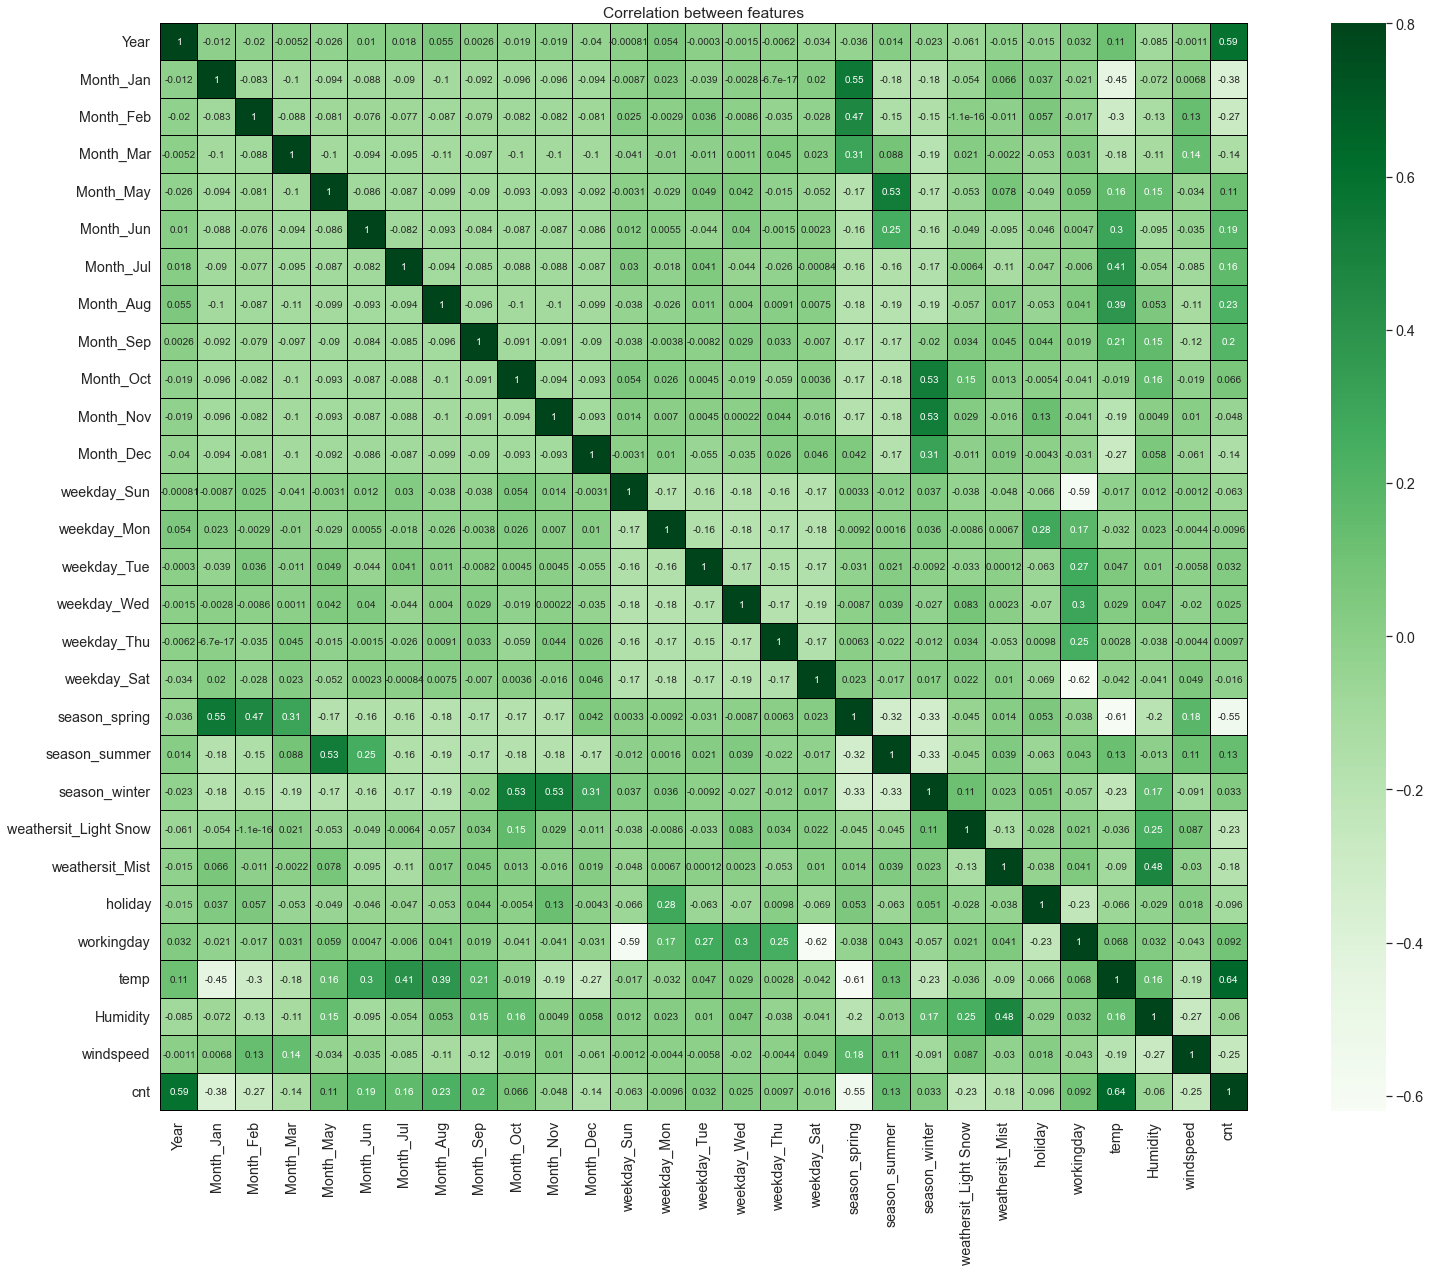

In [57]:
corr = df_train.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='Greens',linecolor ='black')
plt.title('Correlation between features')
plt.show()

__Observation__
- Variables having high correlation with target variable are
   - __temp__ and __cnt__ are highly correlated.
   - __year__ and __cnt__ are highly correlated.
- Other independent variables that are highly correlated are
   - __season_winter__ is highly correlated with month __October and November__.
   - __season_summer__ is highly correlated with __Month_May__.
   - __season_spring__ is highly correlated with __Month_Jan and Month_Feb__.
- Let us take these variables one by one and build our linear regression model.   

### 5.3 Splitting into X_train and y_train on training dataset

In [58]:
y_train = df_train.pop('cnt')               #y_train
X_train = df_train                          #X_train

In [59]:
X_train.head()

,Year,Month_Jan,Month_Feb,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed
653,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0.509887,0.575354,0.300794
576,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.815169,0.725633,0.264686
426,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0.245101,0.498067,0.663106
482,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0.395666,0.504508,0.188475


In [60]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [61]:
y_train_actual = y_train
y_train_actual

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 28 columns):
Year                     510 non-null int32
Month_Jan                510 non-null uint8
Month_Feb                510 non-null uint8
Month_Mar                510 non-null uint8
Month_May                510 non-null uint8
Month_Jun                510 non-null uint8
Month_Jul                510 non-null uint8
Month_Aug                510 non-null uint8
Month_Sep                510 non-null uint8
Month_Oct                510 non-null uint8
Month_Nov                510 non-null uint8
Month_Dec                510 non-null uint8
weekday_Sun              510 non-null uint8
weekday_Mon              510 non-null uint8
weekday_Tue              510 non-null uint8
weekday_Wed              510 non-null uint8
weekday_Thu              510 non-null uint8
weekday_Sat              510 non-null uint8
season_spring            510 non-null uint8
season_summer            510 non-null uint8
season_winter 

- X_train has 510 rows and 28 columns. We will be performing model training with these records.

### 5.4 Building Linear Model using Statsmodel

### 5.4.1 Selecting features and model training using RFE

In [63]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [64]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 16)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [65]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Month_Jan', True, 1),
 ('Month_Feb', False, 3),
 ('Month_Mar', False, 13),
 ('Month_May', False, 5),
 ('Month_Jun', False, 12),
 ('Month_Jul', True, 1),
 ('Month_Aug', False, 7),
 ('Month_Sep', True, 1),
 ('Month_Oct', False, 9),
 ('Month_Nov', True, 1),
 ('Month_Dec', False, 2),
 ('weekday_Sun', False, 4),
 ('weekday_Mon', False, 6),
 ('weekday_Tue', False, 8),
 ('weekday_Wed', False, 11),
 ('weekday_Thu', False, 10),
 ('weekday_Sat', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('Humidity', True, 1),
 ('windspeed', True, 1)]

__Observation__<br/>
- We have selected most important variables out of the dataset to train the model.

In [66]:
#Display selected features
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['Year', 'Month_Jan', 'Month_Jul', 'Month_Sep', 'Month_Nov', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed'], dtype='object')

In [67]:
#Displaying rejected features
X_train.columns[~rfe.support_]

Index(['Month_Feb', 'Month_Mar', 'Month_May', 'Month_Jun', 'Month_Aug', 'Month_Oct', 'Month_Dec', 'weekday_Sun', 'weekday_Mon', 'weekday_Tue', 'weekday_Wed', 'weekday_Thu'], dtype='object')

### 5.4.2 Stats model 1

In [68]:
# importing packages for statsmodel
import statsmodels.api as sm

In [69]:
# Creating X_train dataframe with RFE selected variables
X_train_bike1_features = X_train[rfe_features]

In [70]:
X_train_bike1_features.head()

,Year,Month_Jan,Month_Jul,Month_Sep,Month_Nov,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed
653,1,0,0,0,0,0,0,0,1,0,0,0,1,0.509887,0.575354,0.300794
576,1,0,1,0,0,0,0,0,0,0,0,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,1,1,0,0,0,1,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,0,0,1,0,0,0,0,0,0,0.245101,0.498067,0.663106
482,1,0,0,0,0,1,0,1,0,0,1,0,0,0.395666,0.504508,0.188475


In [71]:
#Creating Constant
X_train_bike1 = sm.add_constant(X_train_bike1_features)

# Create a first fitted model
bike_lm1= sm.OLS(y_train, X_train_bike1).fit()

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [72]:
# Check the parameters obtained
bike_lm1.params

const                    0.258286
Year                     0.230533
Month_Jan               -0.035132
Month_Jul               -0.053469
Month_Sep                0.078527
Month_Nov               -0.024982
weekday_Sat              0.053365
season_spring           -0.055339
season_summer            0.047233
season_winter            0.099910
weathersit_Light Snow   -0.249970
weathersit_Mist         -0.057997
holiday                 -0.053950
workingday               0.043641
temp                     0.502452
Humidity                -0.156408
windspeed               -0.184237
dtype: float64

In [73]:
# Print a summary of the linear regression model obtained
print(bike_lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.10e-190
Time:                        23:06:16   Log-Likelihood:                 520.99
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

__Checking VIF__

In [74]:
#importing packages for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor   

In [75]:
# Check VIF values of the feature variables. 
X_train_bike1_vif = X_train_bike1.drop(['const'],axis = 1)

In [76]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike1_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Humidity,29.47
13,temp,17.90
12,workingday,5.32
15,windspeed,4.78
6,season_spring,4.57
8,season_winter,3.87
7,season_summer,2.85
10,weathersit_Mist,2.29
0,Year,2.09
5,weekday_Sat,1.98


__Observation__<br/>
- For a good model P-value should be less. We will take P-value less than 0.05.
  - __Month_Nov__ has highest P-value of __0.143__.
  
- VIF should be less than 5.
  - Here, we have some variables that has higher VIF.
  
- Let us first drop the variable which has high P-value and re-build the model.

### 5.4.3 Stats model 2<br/>
- Dropping the variable __Month_Nov__ and building another model

In [77]:
X_train_bike2_features = X_train_bike1_features.drop(["Month_Nov"],axis = 1)   # dropping variable Month_Nov

In [78]:
X_train_bike2_features.columns

Index(['Year', 'Month_Jan', 'Month_Jul', 'Month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed'], dtype='object')

In [79]:
#Creating Constant
X_train_bike2 = sm.add_constant(X_train_bike2_features)

# Create a second fitted model
bike_lm2= sm.OLS(y_train, X_train_bike2).fit()

In [80]:
# Check the parameters obtained
bike_lm2.params

const                    0.251042
Year                     0.230502
Month_Jan               -0.034326
Month_Jul               -0.053193
Month_Sep                0.081186
weekday_Sat              0.053721
season_spring           -0.050806
season_summer            0.049660
season_winter            0.094426
weathersit_Light Snow   -0.248777
weathersit_Mist         -0.057824
holiday                 -0.058529
workingday               0.043521
temp                     0.509836
Humidity                -0.154716
windspeed               -0.185956
dtype: float64

In [81]:
# Print a summary of the linear regression model obtained
print(bike_lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.31e-191
Time:                        23:06:33   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

__Checking VIF__

In [82]:
X_train_bike2_vif = X_train_bike2.drop(['const'],axis = 1)    # dropping const

In [83]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike2_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Humidity,29.40
12,temp,17.77
11,workingday,5.31
14,windspeed,4.73
5,season_spring,4.53
7,season_winter,3.48
6,season_summer,2.84
9,weathersit_Mist,2.29
0,Year,2.09
4,weekday_Sat,1.98


__Observation__<br/>
- In the above model P-value for our features are withing 0.05.
- But, VIF of __Humidity and temp__ are higher.
- Since, temp has high impact on renting bike, we will __drop Humidity__.

### 5.4.4 Stats model 3

- __Dropping__ the variable __Humidity__ as it has high VIF of 29.40

In [84]:
X_train_bike3_features = X_train_bike2_features.drop(["Humidity"],axis = 1)        # dropping variable Humidity

In [85]:
X_train_bike3_features.columns

Index(['Year', 'Month_Jan', 'Month_Jul', 'Month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'workingday', 'temp', 'windspeed'], dtype='object')

In [86]:
#Creating Constant
X_train_bike3 = sm.add_constant(X_train_bike3_features)

# Create a third fitted model
bike_lm3= sm.OLS(y_train, X_train_bike3).fit()

In [87]:
#Checking the parameters obtained
bike_lm3.params

const                    0.173663
Year                     0.234361
Month_Jan               -0.038947
Month_Jul               -0.048222
Month_Sep                0.075318
weekday_Sat              0.058434
season_spring           -0.059704
season_summer            0.043352
season_winter            0.079699
weathersit_Light Snow   -0.291727
weathersit_Mist         -0.082621
holiday                 -0.056199
workingday               0.046502
temp                     0.472823
windspeed               -0.156264
dtype: float64

In [88]:
# Print a summary of the linear regression model obtained
print(bike_lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          7.33e-189
Time:                        23:06:47   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

__Checking VIF__

In [89]:
X_train_bike3_vif = X_train_bike3.drop(['const'],axis = 1)

In [90]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike3_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,7.07
11,workingday,5.24
13,windspeed,4.67
5,season_spring,3.08
6,season_summer,2.33
0,Year,2.08
7,season_winter,1.99
4,weekday_Sat,1.97
1,Month_Jan,1.62
2,Month_Jul,1.59


__Observation__<br/>
- In the above model P-values are less than 0.05, but VIF of __temp and workingday__ are above 5.
- We can proceed by dropping __Workingday__.

### 5.4.5 Stats model 4

- __Dropping__ the variable __workingday__ as it has high __VIF__ of __5.24__.

In [91]:
X_train_bike4_features = X_train_bike3_features.drop(["workingday"],axis = 1)

In [92]:
X_train_bike4_features.columns

Index(['Year', 'Month_Jan', 'Month_Jul', 'Month_Sep', 'weekday_Sat', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'temp', 'windspeed'], dtype='object')

In [93]:
#Creating Constant
X_train_bike4 = sm.add_constant(X_train_bike4_features)

# Create a fourth fitted model
bike_lm4= sm.OLS(y_train, X_train_bike4).fit()

In [94]:
#Checking the parameters obtained
bike_lm4.params

const                    0.212097
Year                     0.234633
Month_Jan               -0.038289
Month_Jul               -0.051174
Month_Sep                0.076032
weekday_Sat              0.020135
season_spring           -0.061299
season_summer            0.042485
season_winter            0.076900
weathersit_Light Snow   -0.286860
weathersit_Mist         -0.080792
holiday                 -0.093921
temp                     0.474065
windspeed               -0.157048
dtype: float64

In [95]:
# Print a summary of the linear regression model obtained
print(bike_lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.21e-186
Time:                        23:07:00   Log-Likelihood:                 503.12
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

__Checking VIF__

In [96]:
X_train_bike4_vif = X_train_bike4.drop(['const'],axis = 1)

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike4_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,temp,5.16
12,windspeed,4.64
5,season_spring,2.76
6,season_summer,2.23
0,Year,2.07
7,season_winter,1.80
1,Month_Jan,1.61
2,Month_Jul,1.59
9,weathersit_Mist,1.56
3,Month_Sep,1.34


__Observation__<br/>
- In the above model __weekday_Sat__ has high P-value of__0.074__.
- So, drop the feature __weekday_Sat__.

### 5.4.6 Stats model 5

- Dropping the variable __weekday_Sat__

In [98]:
X_train_bike5_features = X_train_bike4_features.drop(["weekday_Sat"],axis = 1)

In [99]:
X_train_bike5_features.columns

Index(['Year', 'Month_Jan', 'Month_Jul', 'Month_Sep', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'temp', 'windspeed'], dtype='object')

In [100]:
#Creating Constant
X_train_bike5 = sm.add_constant(X_train_bike5_features)

# Create a fifth fitted model
bike_lm5= sm.OLS(y_train, X_train_bike5).fit()

In [101]:
#Checking the parameters obtained
bike_lm5.params

const                    0.215488
Year                     0.234197
Month_Jan               -0.037996
Month_Jul               -0.050722
Month_Sep                0.076239
season_spring           -0.061504
season_summer            0.042205
season_winter            0.077050
weathersit_Light Snow   -0.286377
weathersit_Mist         -0.080675
holiday                 -0.097317
temp                     0.472772
windspeed               -0.154925
dtype: float64

In [102]:
# Print a summary of the linear regression model obtained
print(bike_lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.97e-187
Time:                        23:07:13   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

__Checking VIF__

In [103]:
X_train_bike5_vif = X_train_bike5.drop(['const'],axis = 1)

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike5_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,temp,5.13
11,windspeed,4.61
4,season_spring,2.75
5,season_summer,2.22
0,Year,2.07
6,season_winter,1.79
1,Month_Jan,1.61
2,Month_Jul,1.59
8,weathersit_Mist,1.56
3,Month_Sep,1.34


__Observation__<br/>
- In the above model VIF of __temp__ has reduced to 5.13
- So, by removing variables having P-value above 0, there is possibility to reduce VIF for our features.
- __Month_Jan__ has P-value of __0.034__. We can drop this variable.

### 5.4.7 Stats model 6

- Dropping variable __Month_Jan__

In [105]:
X_train_bike6_features = X_train_bike5_features.drop(["Month_Jan"],axis = 1)     # Dropping variable Month_Jan

In [106]:
X_train_bike6_features.columns

Index(['Year', 'Month_Jul', 'Month_Sep', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'temp', 'windspeed'], dtype='object')

In [107]:
#Creating Constant
X_train_bike6 = sm.add_constant(X_train_bike6_features)

# Create a sixth fitted model
bike_lm6= sm.OLS(y_train, X_train_bike6).fit()

In [108]:
#Checking the parameters obtained
bike_lm6.params

const                    0.199648
Year                     0.233482
Month_Jul               -0.052418
Month_Sep                0.076686
season_spring           -0.066942
season_summer            0.045280
season_winter            0.083084
weathersit_Light Snow   -0.285155
weathersit_Mist         -0.081558
holiday                 -0.098013
temp                     0.491508
windspeed               -0.147977
dtype: float64

In [109]:
# Print a summary of the linear regression model obtained
print(bike_lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          2.40e-187
Time:                        23:07:25   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

__Checking VIF__

In [110]:
X_train_bike6_vif = X_train_bike6.drop(['const'],axis = 1)

In [111]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike6_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
4,season_summer,2.21
3,season_spring,2.08
0,Year,2.07
5,season_winter,1.79
1,Month_Jul,1.58
7,weathersit_Mist,1.55
2,Month_Sep,1.34
6,weathersit_Light Snow,1.08


### 5.4.8 Stats model 7

- Dropping __Month_Jul__

In [112]:
X_train_bike7_features = X_train_bike6_features.drop(["Month_Jul"],axis = 1)            #Dropping variable Month_Jul

In [113]:
X_train_bike7_features.columns

Index(['Year', 'Month_Sep', 'season_spring', 'season_summer', 'season_winter', 'weathersit_Light Snow', 'weathersit_Mist', 'holiday', 'temp', 'windspeed'], dtype='object')

In [114]:
#Creating Constant
X_train_bike7 = sm.add_constant(X_train_bike7_features)

# Create a seventh fitted model
bike_lm7= sm.OLS(y_train, X_train_bike7).fit()

In [115]:
#Checking the parameters obtained
bike_lm7.params

const                    0.190994
Year                     0.234060
Month_Sep                0.090932
season_spring           -0.055092
season_summer            0.060987
season_winter            0.095929
weathersit_Light Snow   -0.286002
weathersit_Mist         -0.080124
holiday                 -0.096865
temp                     0.478177
windspeed               -0.148155
dtype: float64

In [116]:
# Print a summary of the linear regression model obtained
print(bike_lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          7.36e-187
Time:                        23:07:38   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [117]:
y_train_predicted = bike_lm7.predict(X_train_bike7)

In [118]:
y_train_predicted.head()

653    0.720234
576    0.775634
426    0.463550
728    0.388921
482    0.567192
dtype: float64

__Checking VIF__

In [119]:
X_train_bike7_vif = X_train_bike7.drop(['const'],axis = 1)

In [120]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_bike7_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,windspeed,4.59
8,temp,3.84
0,Year,2.07
2,season_spring,1.99
3,season_summer,1.89
4,season_winter,1.63
6,weathersit_Mist,1.54
1,Month_Sep,1.23
5,weathersit_Light Snow,1.08
7,holiday,1.04


__Observation__<br/>
- In the above model,all the selected features have
  - __P-value__ less than 0.05.
  - __VIF__ less than 5.
  - __R-squared of 83.3%__

### 5.5 Line Equation of the model

- We can obtain the best fitted line from the equation<br/>
__cnt = 0.191 + 0.2341 `*` Year + 0.0909`*`Month_sep - 0.0551`*`season_spring + 0.0610`*`season_summer + 0.0959`*`season_winter - 0.2860`*`weathersit_Light Snow - 0.0801`*`weathersit_Mist -0.0969`*`holiday + 0.4782`*`temp - 0.1482`*`windspeed__

### 5.6 Validating the model

__1. Normality of Error__

In [121]:
y_train_pred = bike_lm7.predict(X_train_bike7)      # Predicting based on our final training model

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Errors')

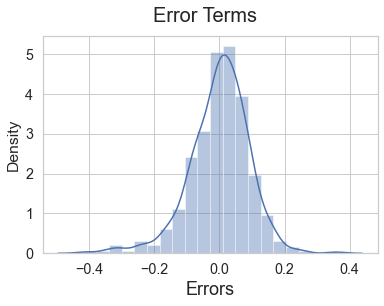

In [122]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

__Observation__<br/>
- Error terms are normally distributed. Assumption of linear regression holds true.

__2. Linear Relationship__

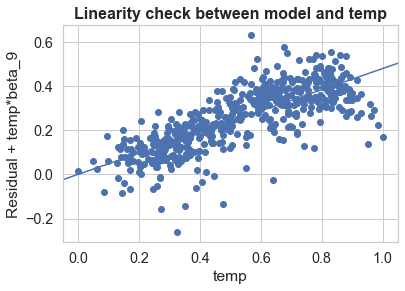

In [123]:
sm.graphics.plot_ccpr(bike_lm7, 'temp')
plt.title("Linearity check between model and temp",fontsize=16,fontweight="bold")
plt.show()

__Observation__<br/>
- Linear relationship exists between our model and independent variable.

__3. Homoscedasticity__

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



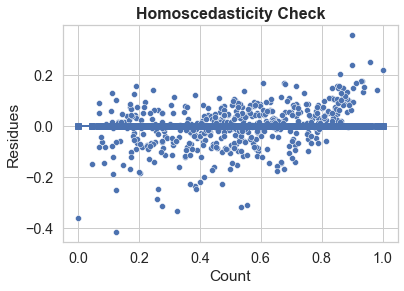

In [124]:
residual = y_train_actual - y_train_predicted
sns.scatterplot(y_train_actual,residual)
plt.plot(y_train_actual,(y_train_actual - y_train_actual), '-s')
plt.xlabel('Count')
plt.ylabel('Residues')
plt.title("Homoscedasticity Check",fontsize=16,fontweight="bold")
plt.show()

__4. Absence of Multicolinearity__

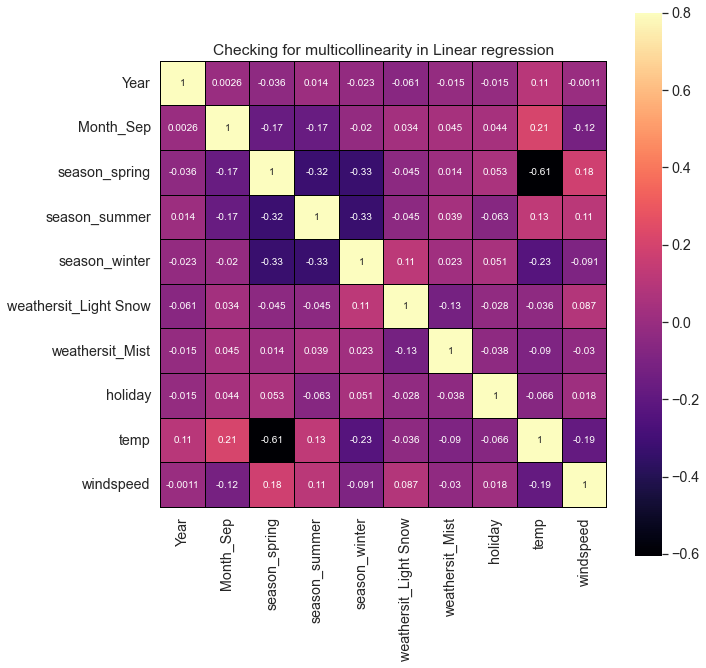

In [126]:
corr = X_train_bike7_features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='magma',linecolor ='black')
plt.title('Checking for multicollinearity in Linear regression')
plt.show()

__5. No autocorrelation of errors__

- There should not be auto correlation of errors. Error terms in linear regression should be independent. 
- Durbin Watson test is used to check autocorrelation.
- Value obtained from Durbin Watson test should be in the range 1.8 to 2.2
- Values exceeding 2.2 indicates negative autocorrelation.

In [127]:
from statsmodels.stats.stattools import durbin_watson

In [128]:
durbin_watson(bike_lm7.resid)

2.075709764541305

__Observation__<br/>
- From Durbin Watson test we obtained value __2.07570__. 
- __Linear regression assumption on No autocorrelation holds true__.

## 6. Testing Linear regression model

In [129]:
# importing packages to calculate R2 score
from sklearn.metrics import r2_score

### 6.1 Rescaling features on Testdata

In [130]:
# Apply scaler() to numeric fields
test_num_var = ['temp','Humidity','windspeed','cnt']
df_test[test_num_var] = scaler.transform(df_test[test_num_var])
df_test.head()

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Year,Month_Jan,Month_Feb,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed,cnt
184,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0.831783,0.657364,0.084219,0.692706
535,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0.901354,0.610133,0.153728,0.712034
299,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0.511964,0.837699,0.334206,0.303382
221,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.881625,0.437098,0.339570,0.547400
152,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0.817246,0.314298,0.537414,0.569029


In [131]:
df_test.describe()

,Year,Month_Jan,Month_Feb,Month_Mar,Month_May,Month_Jun,Month_Jul,Month_Aug,Month_Sep,Month_Oct,Month_Nov,Month_Dec,weekday_Sun,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Sat,season_spring,season_summer,season_winter,weathersit_Light Snow,weathersit_Mist,holiday,workingday,temp,Humidity,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.077626,0.100457,0.054795,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.146119,0.127854,0.164384,0.100457,0.164384,0.118721,0.255708,0.264840,0.232877,0.027397,0.319635,0.036530,0.698630,0.558941,0.638508,0.313350,0.520592
std,0.500722,0.268194,0.301297,0.228100,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.354034,0.334692,0.371472,0.301297,0.371472,0.324202,0.437258,0.442259,0.423633,0.163612,0.467403,0.188034,0.459904,0.233698,0.148974,0.159947,0.218435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300


- We can observe from IQR range that there is no outlier in our testset.

### 6.2 Splitting into X_test and y_test

In [132]:
y_test = df_test.pop('cnt')
X_test = df_test

In [133]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
404    0.438104
198    0.510354
171    0.553728
512    0.692706
200    0.495858
509    0.772204
559    0.799241
109    0.451220
467    0.733548
339    0.295904
589    0.789347
222    0.548780
40     0.174413
682    0.629659
453    0.625518
606    0.884837
265    0.273010
510    0.749425
19     0.219167
117    0.464335
423    0.499425
614    0.860792
163    0.575012
630    0.907156
191    0.467556
572    0.791763
662    0.844110
264    0.549126
625    0.466061
325    0.182352
114    0.466061
218    0.432927
678    0.749425
24     0.225840
432    0.523125
395    0.516222
48     0.334215
684    0.653014
203    0.375403
450    0.584445
538    0.855499
73     0.234008
269    0.471468
710    0.609411
98     0.279913
530    0.879314
173    0.548550
418    0.579844
503    0.951680
727    0.151749
550    0.715486
714    0.433042
448    0.572250
248    0.309250
685    0.645076
410    0.477105
201    0.432812
41     0

In [134]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
Year                     219 non-null int32
Month_Jan                219 non-null uint8
Month_Feb                219 non-null uint8
Month_Mar                219 non-null uint8
Month_May                219 non-null uint8
Month_Jun                219 non-null uint8
Month_Jul                219 non-null uint8
Month_Aug                219 non-null uint8
Month_Sep                219 non-null uint8
Month_Oct                219 non-null uint8
Month_Nov                219 non-null uint8
Month_Dec                219 non-null uint8
weekday_Sun              219 non-null uint8
weekday_Mon              219 non-null uint8
weekday_Tue              219 non-null uint8
weekday_Wed              219 non-null uint8
weekday_Thu              219 non-null uint8
weekday_Sat              219 non-null uint8
season_spring            219 non-null uint8
season_summer            219 non-null uint8
season_winter 

- Test data set contains 219 records and 28 columns.

### 6.3 Performing predictions on Testset

In [135]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe from train features
X_test_new = X_test[X_train_bike7_features.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


C:\Users\VINODA VARSHINI\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [136]:
# Making predictions
y_pred = bike_lm7.predict(X_test_new)

### 7. Model Evaluation

Text(0, 0.5, 'y_pred')

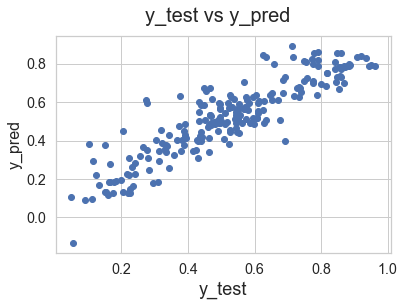

In [137]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # y-label

__Observation__<br/>
- y_test and y_pred forms a linear relationship.

### 7.1 Model Evaluation using R-squared value

In [138]:
# Evaluation
r_squared = r2_score(y_test,y_pred)
print(r_squared)

0.8035441330582012


__Observation__<br/>
- From the test set, we obtained __R-squared value of 80.35%__.

### 7.2 Model Evaluation using Adjusted R-squared value

In [139]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test_new.shape[1]-1)
print(adjusted_r_squared)

0.7931044493076708


__Observation__<br/>
- __Adjusted R-squared of test set is 79.31%__

### 7.3 Model Evaluation using RMSE

In [140]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [141]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

0.0965962223188116


## 8. Conclusion

- We have obtained a good model which predicts the most important factors that influence renting a bike from BoomBikes.

- Equation of the model comes out to be
  - __cnt = 0.1910 + 0.2341 `*` Year + 0.0909`*`Month_sep - 0.0551`*`season_spring + 0.0610`*`season_summer + 0.0959`*`season_winter - 0.2860`*`weathersit_Light Snow - 0.0801`*`weathersit_Mist -0.0969`*`holiday + 0.4782`*`temp - 0.1482`*`windspeed__
  
- Evaluating our model with test data gave us good values for 
  - __*R-Squared          : 0.8035441330582012*__
  - __*Adjusted R-squared : 0.7931044493076708*__
  - __*RMSE               : 0.0965962223188116*__
  
- We could find that the count of __bike rentals increases with__  
  - __Temperature(temp)__ plays an __important role__ in renting a bike, its coefficient __0.4782__ is highest compared to other features.
  - __Year__ has a good coefficient of __0.2341__. So, there is high chance that people will prefer renting bike in comming years.

- Some other pattern when __bike rentals are not preferred__
  - During __season_Spring__, its coefficient __-0.0551__ says bike rentals are less.
  - When the weathere is __Light Snow__, bike rentals are highly affected.
  - __windspeed__ also affects the bike rental count.
  
- __BoomBikes__ can consider the following suggestions to increase their revenue
  - During __September__ there are high chances of people renting bike, so we can increase the number of bikes in     their dock.
  - During __Fall and Summer__ people prefer to rent bikes than other season. So, we can increase number of dock in places where the distance between our next dock is high.
